# Online News Popularity

In [1]:
import numpy as np
import pandas as pd # para leer datos
import matplotlib.pyplot as plt
import sklearn.manifold
import sklearn.datasets
import glob
import sklearn.cluster

In [2]:
# Carga datos
data = pd.read_csv( 'OnlineNewsPopularity.csv' )
data = data.sample( 2000 )
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
15279,http://mashable.com/2013/10/29/amazing-hallowe...,436.0,9.0,184.0,0.635870,1.0,0.728814,8.0,6.0,1.0,...,0.40,0.5,-0.152778,-0.166667,-0.125000,1.000,0.000,0.500,0.000,845
8069,http://mashable.com/2013/06/07/urbanwonderer-c...,580.0,9.0,1045.0,0.484089,1.0,0.676056,17.0,0.0,1.0,...,0.10,1.0,-0.301587,-1.000000,-0.050000,0.000,0.000,0.500,0.000,1800
14548,http://mashable.com/2013/10/15/12-signs-its-ti...,450.0,11.0,563.0,0.452594,1.0,0.542466,5.0,4.0,29.0,...,0.10,0.5,-0.220328,-0.500000,-0.100000,0.750,0.375,0.250,0.375,779
28416,http://mashable.com/2014/07/07/maleficent-cros...,185.0,10.0,922.0,0.476400,1.0,0.696060,23.0,2.0,2.0,...,0.05,1.0,-0.292386,-0.500000,-0.071429,0.725,0.600,0.225,0.600,540
28175,http://mashable.com/2014/07/02/instagram-was-b...,190.0,12.0,348.0,0.534125,1.0,0.703518,4.0,1.0,1.0,...,0.16,0.5,-0.225000,-0.250000,-0.200000,0.000,0.000,0.500,0.000,7500


In [3]:
data.keys()

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [4]:
n_articles = len(data)
X = data[data.keys()[1:-1]] # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
Y = data[' shares']
print(np.shape(X), np.shape(Y))

(2000, 59) (2000,)


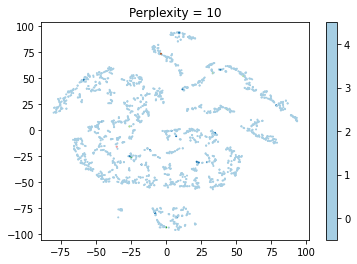

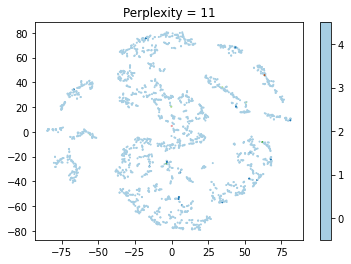

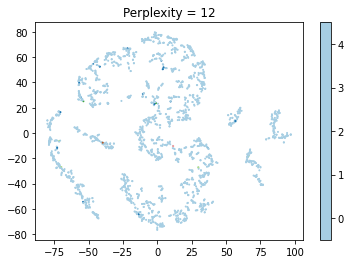

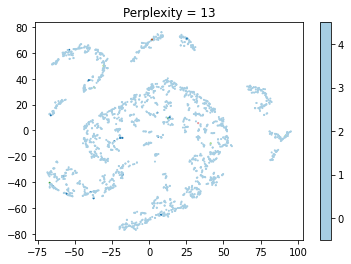

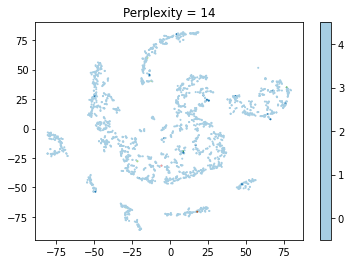

In [5]:
for per in range(10,15):
    # t-distributed Stochastic Neighbor Embedding
    tsne = sklearn.manifold.TSNE(perplexity=per) # perplexity is related to the number of nearest neighbors that is used

    # Ahora ejecutamos la fase de aprendizaje
    tsne.fit(X)

    # Extraemos la representación de los datos en el espacio bidimensional
    embedding = tsne.embedding_
    
    rating_scale = 5
    
    plt.figure()
    plt.title( 'Perplexity = ' + str(per) )
    plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(rating_scale+1)-0.5).set_ticks(np.arange(rating_scale+1))
    plt.show()

In [21]:
# t-distributed Stochastic Neighbor Embedding
best_per = 14
tsne = sklearn.manifold.TSNE(perplexity=best_per) # perplexity is related to the number of nearest neighbors that is used

# Ahora ejecutamos la fase de aprendizaje
tsne.fit(X)

# Extraemos la representación de los datos en el espacio bidimensional
embedding = tsne.embedding_

In [22]:
# clusters sobre los resultados de tsne
n_clusters = 7
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster

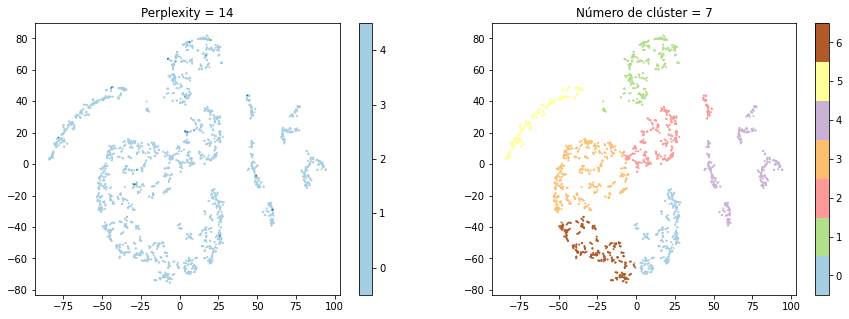

In [28]:
plt.figure(figsize=(15,5))
plt.angulos = np.linspace(0,2*np.pi,100)

plt.subplot(1,2,1)
rating_scale = 5
plt.title( 'Perplexity = ' + str(best_per) )
plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(rating_scale+1)-0.5).set_ticks(np.arange(rating_scale+1))


plt.subplot(1,2,2)
plt.title( 'Número de clúster = ' + str(n_clusters) )
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(n_clusters+1)-0.5).set_ticks(np.arange(n_clusters+1))

## De acuerdo a las gráficas por medio de t-SNE no es posible identificar los clúster que caracterizarían la popularidad de la noticia de acuerdo a la semántica de la misma. Cuando se usa, adicionalmente, K-means, aparecen clúster que no se habían identificado con t-SNE. Habría de analizar cuáles son los elementos gramaticales que más aportan para que una noticia se vuelva atractiva para el lector y así, sea compartida la mayor cantidad de veces. Asimismo, es necesario examinar con detalle las razones por las cuáles t-SNE no clasifica las noticias de acuerdo a su rating.